In [208]:
import pandas as pd
import numpy as np

In [209]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [210]:
import glob

In [211]:
path = r'data/shipments/' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

ship = pd.concat(li, axis=0, ignore_index=True)

In [212]:
add = pd.read_csv('data/misc/addresses.csv')

In [213]:
orders = pd.read_pickle('shipments_w_stats.pkl')

In [214]:
orders.head()

,shipment_id,unique_categories,nunique_categories,total_sum,discount,price_min,price_max,price_sum,nunique_items,ncancelled,n_items
0,387023,"[34.0, 22.0, 23.0, 26.0, 24.0, 40.0, 593.0, 58...",25,4121.980019,427.259998,16.799999,388.940002,3603.940004,37,1,58
1,442659,"[85.0, 38.0, 45.0, 122.0, 15.0, 26.0, 28.0, 31...",24,6185.680015,722.860000,13.080000,658.000000,4724.860004,37,0,69
2,571826,"[30.0, 622.0, 122.0, 85.0, 91.0, 280.0, 284.0,...",18,5723.950014,604.989998,17.690001,679.000000,5364.870020,42,3,48
3,616984,"[653.0, 50.0, 76.0, 622.0, 256.0, 261.0, 379.0...",18,8418.200075,64.860003,35.000000,567.010010,5959.800014,26,0,65
4,695703,"[234.0, 26.0, 23.0, 29.0, 34.0, 31.0, 32.0, 21...",34,7333.179983,170.000002,4.570000,308.000000,6960.119991,62,2,85


In [215]:
ship = ship.merge(orders, how = 'inner', left_on = ['shipment_id'], right_on = ['shipment_id'])

In [216]:
del(orders)

In [217]:
ship.head()

,user_id,ship_address_id,shipment_id,order_id,order_created_at,order_completed_at,shipment_starts_at,retailer,s.order_state,shipment_state,s.city_name,s.store_id,total_cost,rate,dw_kind,promo_total,total_weight,platform,os,shipped_at,unique_categories,nunique_categories,total_sum,discount,price_min,price_max,price_sum,nunique_items,ncancelled,n_items
0,11019,171906,322307,2156687,2017-08-03 21:25:23,2020-02-18 14:07:00,2020-02-20 07:00:00,METRO,complete,shipped,Москва,21,168.0,0,courier,0.0,30170,web,windows,2020-02-20 08:08:54,"[61.0, 257.0, 85.0, 26.0, 120.0, 225.0, 224.0,...",16,3294.400031,284.900002,6.520000,259.390015,2300.910016,24,1,47
1,62278,278832,387023,3021953,2018-03-02 17:22:04,2020-01-03 13:09:26,2020-01-03 17:00:00,METRO,complete,shipped,Москва,10,98.0,0,courier,-150.0,11305,web,windows,2020-01-03 18:10:40,"[34.0, 22.0, 23.0, 26.0, 24.0, 40.0, 593.0, 58...",25,4121.980019,427.259998,16.799999,388.940002,3603.940004,37,1,58
2,905126,468407,388943,3018198,2018-02-28 11:32:47,2020-02-12 12:39:28,2020-02-13 11:00:00,METRO,complete,shipped,Москва,21,98.0,5,courier,0.0,13589,app,ios,2020-02-13 12:33:53,"[179.0, 113.0, 214.0, 205.0, 26.0, 30.0, 29.0,...",30,13038.859973,1713.069997,4.490000,2799.000000,13223.789965,49,0,67
3,21412,61962,421048,3030227,2018-03-07 20:37:27,2020-01-25 11:58:56,2020-01-25 18:00:00,METRO,complete,shipped,Москва,8,158.0,0,courier,0.0,9726,web,mac,2020-01-25 19:55:32,"[261.0, 247.0, 255.0, 122.0, 598.0, 62.0, 606....",34,12913.540010,630.989996,9.190000,898.989990,8330.179986,63,0,173
4,42110,378297,442659,2923996,2017-12-24 11:19:04,2020-01-07 14:30:44,2020-01-07 19:00:00,METRO,complete,shipped,Москва,2,163.0,0,courier,0.0,30323,web,windows,2020-01-07 19:51:37,"[85.0, 38.0, 45.0, 122.0, 15.0, 26.0, 28.0, 31...",24,6185.680015,722.860000,13.080000,658.000000,4724.860004,37,0,69


In [218]:
ship = ship.drop(columns = ['order_created_at', 's.store_id'])

In [219]:
add.shape

(2766724, 2)

In [220]:
add.head()

,id,phone_id
0,41,1
1,8531,2
2,2982657,2
3,3271801,2
4,3648206,2


In [221]:
ship.shape

(2259755, 28)

In [222]:
len(ship.order_id.unique())

2225223

In [223]:
len(ship.shipment_id.unique())

2259755

In [224]:
ship = ship.merge(add, how = 'outer', left_on = ['ship_address_id'], right_on = ['id'])

In [225]:
ship.shape

(2838627, 30)

In [226]:
ship.order_completed_at = ship.order_completed_at.astype('str') 

In [227]:
ship['month'] = ship['order_completed_at'].apply(lambda x: x[:7])

In [228]:
ship.head()

,user_id,ship_address_id,shipment_id,order_id,order_completed_at,shipment_starts_at,retailer,s.order_state,shipment_state,s.city_name,total_cost,rate,dw_kind,promo_total,total_weight,platform,os,shipped_at,unique_categories,nunique_categories,total_sum,discount,price_min,price_max,price_sum,nunique_items,ncancelled,n_items,id,phone_id,month
0,11019.0,171906.0,322307.0,2156687.0,2020-02-18 14:07:00,2020-02-20 07:00:00,METRO,complete,shipped,Москва,168.0,0.0,courier,0.0,30170.0,web,windows,2020-02-20 08:08:54,"[61.0, 257.0, 85.0, 26.0, 120.0, 225.0, 224.0,...",16.0,3294.400031,284.900002,6.520000,259.390015,2300.910016,24.0,1.0,47.0,171906,78177,2020-02
1,62278.0,278832.0,387023.0,3021953.0,2020-01-03 13:09:26,2020-01-03 17:00:00,METRO,complete,shipped,Москва,98.0,0.0,courier,-150.0,11305.0,web,windows,2020-01-03 18:10:40,"[34.0, 22.0, 23.0, 26.0, 24.0, 40.0, 593.0, 58...",25.0,4121.980019,427.259998,16.799999,388.940002,3603.940004,37.0,1.0,58.0,278832,96681,2020-01
2,905126.0,468407.0,388943.0,3018198.0,2020-02-12 12:39:28,2020-02-13 11:00:00,METRO,complete,shipped,Москва,98.0,5.0,courier,0.0,13589.0,app,ios,2020-02-13 12:33:53,"[179.0, 113.0, 214.0, 205.0, 26.0, 30.0, 29.0,...",30.0,13038.859973,1713.069997,4.490000,2799.000000,13223.789965,49.0,0.0,67.0,468407,140317,2020-02
3,21412.0,61962.0,421048.0,3030227.0,2020-01-25 11:58:56,2020-01-25 18:00:00,METRO,complete,shipped,Москва,158.0,0.0,courier,0.0,9726.0,web,mac,2020-01-25 19:55:32,"[261.0, 247.0, 255.0, 122.0, 598.0, 62.0, 606....",34.0,12913.540010,630.989996,9.190000,898.989990,8330.179986,63.0,0.0,173.0,61962,16,2020-01
4,42110.0,378297.0,442659.0,2923996.0,2020-01-07 14:30:44,2020-01-07 19:00:00,METRO,complete,shipped,Москва,163.0,0.0,courier,0.0,30323.0,web,windows,2020-01-07 19:51:37,"[85.0, 38.0, 45.0, 122.0, 15.0, 26.0, 28.0, 31...",24.0,6185.680015,722.860000,13.080000,658.000000,4724.860004,37.0,0.0,69.0,378297,60075,2020-01


In [229]:
ship_num = ship[['phone_id', 'total_cost', 'month', 'total_weight']].groupby(['phone_id', 'month']).agg(['sum', 'mean', 'count'])

In [230]:
ship_num = ship_num.reset_index()
ship_num.columns = ['_'.join(col).strip() for col in ship_num.columns.values]
ship_num['ship_count'] = ship_num['total_cost_count']
ship_num = ship_num.drop(columns = ['total_cost_count', 'total_weight_count'])

In [231]:
ship_num.head()

,phone_id_,month_,total_cost_sum,total_cost_mean,total_weight_sum,total_weight_mean,ship_count
0,1,nan,0.0,NaN,0.0,NaN,0
1,2,2020-01,98.0,98.0,22024.0,22024.0,1
2,2,2020-02,366.0,183.0,67946.0,33973.0,2
3,2,2020-03,233.0,233.0,34195.0,34195.0,1
4,2,2020-05,248.0,248.0,40777.0,40777.0,1


In [232]:
ship_num = ship_num.rename(columns =  {'phone_id_':'phone_id', 'month_':'month'})

In [233]:
ship_num.shape

(1420171, 7)

### Order stats

In [234]:
ship.head()

,user_id,ship_address_id,shipment_id,order_id,order_completed_at,shipment_starts_at,retailer,s.order_state,shipment_state,s.city_name,total_cost,rate,dw_kind,promo_total,total_weight,platform,os,shipped_at,unique_categories,nunique_categories,total_sum,discount,price_min,price_max,price_sum,nunique_items,ncancelled,n_items,id,phone_id,month
0,11019.0,171906.0,322307.0,2156687.0,2020-02-18 14:07:00,2020-02-20 07:00:00,METRO,complete,shipped,Москва,168.0,0.0,courier,0.0,30170.0,web,windows,2020-02-20 08:08:54,"[61.0, 257.0, 85.0, 26.0, 120.0, 225.0, 224.0,...",16.0,3294.400031,284.900002,6.520000,259.390015,2300.910016,24.0,1.0,47.0,171906,78177,2020-02
1,62278.0,278832.0,387023.0,3021953.0,2020-01-03 13:09:26,2020-01-03 17:00:00,METRO,complete,shipped,Москва,98.0,0.0,courier,-150.0,11305.0,web,windows,2020-01-03 18:10:40,"[34.0, 22.0, 23.0, 26.0, 24.0, 40.0, 593.0, 58...",25.0,4121.980019,427.259998,16.799999,388.940002,3603.940004,37.0,1.0,58.0,278832,96681,2020-01
2,905126.0,468407.0,388943.0,3018198.0,2020-02-12 12:39:28,2020-02-13 11:00:00,METRO,complete,shipped,Москва,98.0,5.0,courier,0.0,13589.0,app,ios,2020-02-13 12:33:53,"[179.0, 113.0, 214.0, 205.0, 26.0, 30.0, 29.0,...",30.0,13038.859973,1713.069997,4.490000,2799.000000,13223.789965,49.0,0.0,67.0,468407,140317,2020-02
3,21412.0,61962.0,421048.0,3030227.0,2020-01-25 11:58:56,2020-01-25 18:00:00,METRO,complete,shipped,Москва,158.0,0.0,courier,0.0,9726.0,web,mac,2020-01-25 19:55:32,"[261.0, 247.0, 255.0, 122.0, 598.0, 62.0, 606....",34.0,12913.540010,630.989996,9.190000,898.989990,8330.179986,63.0,0.0,173.0,61962,16,2020-01
4,42110.0,378297.0,442659.0,2923996.0,2020-01-07 14:30:44,2020-01-07 19:00:00,METRO,complete,shipped,Москва,163.0,0.0,courier,0.0,30323.0,web,windows,2020-01-07 19:51:37,"[85.0, 38.0, 45.0, 122.0, 15.0, 26.0, 28.0, 31...",24.0,6185.680015,722.860000,13.080000,658.000000,4724.860004,37.0,0.0,69.0,378297,60075,2020-01


In [235]:
sum(ship.shipment_id.isnull())

506934

In [236]:
ship.shape

(2838627, 31)

In [277]:
key = ['phone_id', 'month']

In [279]:
avg_sum = ship[key+['total_sum', 'n_items']].groupby(key).sum()

In [282]:
avg_sum.reset_index(inplace = True)

In [284]:
avg_sum['avg_sum'] = avg_sum.total_sum/avg_sum.n_items

In [285]:
avg_sum.head()

,phone_id,month,total_sum,n_items,avg_sum
0,1,nan,0.000000,0.0,NaN
1,2,2020-01,2700.530008,38.0,71.066579
2,2,2020-02,5786.900053,88.0,65.760228
3,2,2020-03,4008.390045,52.0,77.084424
4,2,2020-05,5498.140022,54.0,101.817408


In [287]:
avg_sum.shape

(1420171, 5)

In [289]:
price_min = ship[key+['price_min']].groupby(key).min()
price_min.reset_index(inplace=True)

In [294]:
price_max = ship[key+['price_max']].groupby(key).max()
price_max.reset_index(inplace=True)

In [295]:
price_max.head()

,phone_id,month,price_max
0,1,nan,NaN
1,2,2020-01,599.000000
2,2,2020-02,344.059998
3,2,2020-03,399.000000
4,2,2020-05,556.210022


### String

In [237]:
ship.head()

,user_id,ship_address_id,shipment_id,order_id,order_completed_at,shipment_starts_at,retailer,s.order_state,shipment_state,s.city_name,total_cost,rate,dw_kind,promo_total,total_weight,platform,os,shipped_at,unique_categories,nunique_categories,total_sum,discount,price_min,price_max,price_sum,nunique_items,ncancelled,n_items,id,phone_id,month
0,11019.0,171906.0,322307.0,2156687.0,2020-02-18 14:07:00,2020-02-20 07:00:00,METRO,complete,shipped,Москва,168.0,0.0,courier,0.0,30170.0,web,windows,2020-02-20 08:08:54,"[61.0, 257.0, 85.0, 26.0, 120.0, 225.0, 224.0,...",16.0,3294.400031,284.900002,6.520000,259.390015,2300.910016,24.0,1.0,47.0,171906,78177,2020-02
1,62278.0,278832.0,387023.0,3021953.0,2020-01-03 13:09:26,2020-01-03 17:00:00,METRO,complete,shipped,Москва,98.0,0.0,courier,-150.0,11305.0,web,windows,2020-01-03 18:10:40,"[34.0, 22.0, 23.0, 26.0, 24.0, 40.0, 593.0, 58...",25.0,4121.980019,427.259998,16.799999,388.940002,3603.940004,37.0,1.0,58.0,278832,96681,2020-01
2,905126.0,468407.0,388943.0,3018198.0,2020-02-12 12:39:28,2020-02-13 11:00:00,METRO,complete,shipped,Москва,98.0,5.0,courier,0.0,13589.0,app,ios,2020-02-13 12:33:53,"[179.0, 113.0, 214.0, 205.0, 26.0, 30.0, 29.0,...",30.0,13038.859973,1713.069997,4.490000,2799.000000,13223.789965,49.0,0.0,67.0,468407,140317,2020-02
3,21412.0,61962.0,421048.0,3030227.0,2020-01-25 11:58:56,2020-01-25 18:00:00,METRO,complete,shipped,Москва,158.0,0.0,courier,0.0,9726.0,web,mac,2020-01-25 19:55:32,"[261.0, 247.0, 255.0, 122.0, 598.0, 62.0, 606....",34.0,12913.540010,630.989996,9.190000,898.989990,8330.179986,63.0,0.0,173.0,61962,16,2020-01
4,42110.0,378297.0,442659.0,2923996.0,2020-01-07 14:30:44,2020-01-07 19:00:00,METRO,complete,shipped,Москва,163.0,0.0,courier,0.0,30323.0,web,windows,2020-01-07 19:51:37,"[85.0, 38.0, 45.0, 122.0, 15.0, 26.0, 28.0, 31...",24.0,6185.680015,722.860000,13.080000,658.000000,4724.860004,37.0,0.0,69.0,378297,60075,2020-01


In [238]:
ship.retailer.value_counts() 

METRO                    1335731
Лента                     561653
Ашан                      379812
МЕГАМАРТ                   14633
Азбука Вкуса                6860
ВкусВилл                    6608
ВИКТОРИЯ                    4088
Командор                    3496
BILLA                       3315
Бахетле                     2642
SELGROS                     2492
Аллея                       1652
ЗЕЛЕНОЕ ЯБЛОКО              1588
REAL                        1057
Хороший                      764
МАГНОЛИЯ                     639
Быстроном                    447
ПАРУС                        420
ДЕЯ                          337
УДАЧНАЯ ПОКУПКА              288
ТИТАН                        241
YVES ROCHER                  226
ВЕГА                         210
КАРАВАН                      208
Фреш25                       207
Дочки-Сыночки                197
ТД ХОРОШИЙ                   194
Шан                          191
СЕДЬМАЯ СТОЛИЦА              185
СИГМА                        184
Столичный 

In [239]:
retailer = make_pred('retailer')
retailer.head()

,phone_id,month,retailer_ratio_BILLA,retailer_ratio_Home Market,retailer_ratio_METRO,retailer_ratio_REAL,retailer_ratio_SELGROS,retailer_ratio_YVES ROCHER,retailer_ratio_АГРОКОМПЛЕКС,retailer_ratio_АУТЛЕТ,retailer_ratio_Азбука Вкуса,retailer_ratio_Аллея,retailer_ratio_Ашан,retailer_ratio_БЕГЕМАГ,retailer_ratio_Бахетле,retailer_ratio_Быстроном,retailer_ratio_ВЕГА,retailer_ratio_ВИКТОРИЯ,retailer_ratio_ВкусВилл,retailer_ratio_ДЕЯ,retailer_ratio_Дочки-Сыночки,retailer_ratio_ЗЕЛЕНОЕ ЯБЛОКО,retailer_ratio_Забайкальский Привозъ,retailer_ratio_ИДЕЯ,retailer_ratio_КАРАВАН,retailer_ratio_КИТ,retailer_ratio_Командор,retailer_ratio_Лента,retailer_ratio_МАГНОЛИЯ,retailer_ratio_МЕГАМАРТ,retailer_ratio_МаксМаркет,retailer_ratio_Осень,retailer_ratio_ПАРУС,retailer_ratio_ПроВино,retailer_ratio_СЕДЬМАЯ СТОЛИЦА,retailer_ratio_СИГМА,retailer_ratio_СберМаркет,retailer_ratio_Столичный,retailer_ratio_ТД ХОРОШИЙ,retailer_ratio_ТИТАН,"retailer_ratio_ТЦ ""Новомариинский""",retailer_ratio_ТЦ STOЛИЦА,retailer_ratio_УДАЧНАЯ ПОКУПКА,retailer_ratio_Улыбка Радуги,retailer_ratio_Фреш25,retailer_ratio_Хороший,retailer_ratio_Шан,retailer_ratio_ЮгОпт
0,2,2020-01,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2020-02,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020-03,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2020-05,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,2020-03,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [240]:
cols = ['phone_id', 'month', 'retailer_ratio_METRO', 'retailer_ratio_Ашан', 'retailer_ratio_ВкусВилл', 'retailer_ratio_Лента']
retailer = retailer[cols]

In [241]:
retailer.head()

,phone_id,month,retailer_ratio_METRO,retailer_ratio_Ашан,retailer_ratio_ВкусВилл,retailer_ratio_Лента
0,2,2020-01,1.0,NaN,NaN,NaN
1,2,2020-02,1.0,NaN,NaN,NaN
2,2,2020-03,1.0,NaN,NaN,NaN
3,2,2020-05,1.0,NaN,NaN,NaN
4,3,2020-03,1.0,NaN,NaN,NaN


In [242]:
retailer.shape

(1155514, 6)

#### city

In [243]:
city = ship[['phone_id', 's.city_name', 'month']].groupby(['phone_id', 'month'])['s.city_name'].agg(pd.Series.mode)
city.head()

ValueError: Function does not reduce

In [ ]:
city= pd.DataFrame(city)
city.head()

In [ ]:
city.reset_index(inplace = True)

In [ ]:
city.head()

#### order state

In [244]:
order_state = make_pred('s.order_state')
order_state.head()

,phone_id,month,s.order_state_ratio_canceled,s.order_state_ratio_cart,s.order_state_ratio_complete,s.order_state_ratio_resumed
0,2,2020-01,NaN,NaN,1.0,NaN
1,2,2020-02,NaN,NaN,1.0,NaN
2,2,2020-03,NaN,NaN,1.0,NaN
3,2,2020-05,NaN,NaN,1.0,NaN
4,3,2020-03,NaN,NaN,1.0,NaN


### dw_kind

In [245]:
dw_kind = make_pred('dw_kind')
dw_kind.head()

,phone_id,month,dw_kind_ratio_courier,dw_kind_ratio_express_delivery,dw_kind_ratio_pickup
0,2,2020-01,1.0,NaN,NaN
1,2,2020-02,1.0,NaN,NaN
2,2,2020-03,1.0,NaN,NaN
3,2,2020-05,1.0,NaN,NaN
4,3,2020-03,1.0,NaN,NaN


#### platfrom

In [246]:
platform = make_pred('platform')
platform.head()

,phone_id,month,platform_ratio_app,platform_ratio_web
0,2,2020-01,NaN,1.0
1,2,2020-02,NaN,1.0
2,2,2020-03,NaN,1.0
3,2,2020-05,NaN,1.0
4,3,2020-03,NaN,1.0


#### OS

In [247]:
os = make_pred('os')
os.head()

,phone_id,month,os_ratio_android,os_ratio_ios,os_ratio_linux,os_ratio_mac,os_ratio_other,os_ratio_windows
0,2,2020-01,NaN,NaN,NaN,NaN,NaN,1.0
1,2,2020-02,NaN,NaN,NaN,NaN,NaN,1.0
2,2,2020-03,NaN,NaN,NaN,NaN,NaN,1.0
3,2,2020-05,NaN,NaN,NaN,NaN,NaN,1.0
4,3,2020-03,1.0,NaN,NaN,NaN,NaN,NaN


In [248]:
os.shape

(1155508, 8)

#### Get age and gender

In [249]:
client = pd.read_csv('data/misc/user_profiles.csv')
client.shape

(396820, 3)

In [250]:
client.bdate.fillna(2020, inplace = True)
client.bdate = client.bdate.astype('str')

In [251]:
client['age'] = client['bdate'].apply(lambda x: x[:4])

In [252]:
client.head()

,user_id,gender,bdate,age
0,2226207,NaN,2020,2020
1,2226207,NaN,2020,2020
2,2226207,NaN,2020,2020
3,1684318,male,1987-10-11,1987
4,1684318,male,1987-10-11,1987


In [255]:
temp = ship.merge(client, how = 'inner', left_on = 'user_id', right_on = 'user_id')

In [256]:
temp.shape

(3511836, 34)

In [257]:
age = temp[['phone_id', 'month', 'age']].groupby(['phone_id', 'month']).min()

In [262]:
age.shape
age.reset_index(inplace=True)

In [263]:
age.head()

,phone_id,month,age
0,5,2020-04,2020
1,6,2020-01,2020
2,6,2020-02,2020
3,6,2020-03,2020
4,6,2020-04,2020


In [264]:
gender = temp[['phone_id', 'month', 'gender']].groupby(['phone_id', 'month']).min()

In [268]:
gender = pd.DataFrame(gender)

In [270]:
gender.reset_index(inplace=True)

In [273]:
gender.columns = ['phone_id', 'month', 'column', 'gender']

In [275]:
gender.drop(columns = ['column'], inplace = True)

### Total df with predictors

In [42]:
from functools import reduce

In [296]:
dfs = [os, platform, dw_kind, order_state, retailer, age, gender] #city
key = ['phone_id', 'month']
final = reduce(lambda left,right: pd.merge(left,right,on=key), dfs)

In [297]:
final = ship_num.merge(final, how = 'left', left_on = key, right_on = key)
final = avg_sum.merge(final, how = 'left', left_on = key, right_on = key)
final = price_min.merge(final, how = 'left', left_on = key, right_on = key)
final = price_max.merge(final, how = 'left', left_on = key, right_on = key)

In [298]:
final.shape

(1420171, 33)

In [299]:
final.head()

,phone_id,month,price_max,price_min,total_sum,n_items,avg_sum,total_cost_sum,total_cost_mean,total_weight_sum,total_weight_mean,ship_count,os_ratio_android,os_ratio_ios,os_ratio_linux,os_ratio_mac,os_ratio_other,os_ratio_windows,platform_ratio_app,platform_ratio_web,dw_kind_ratio_courier,dw_kind_ratio_express_delivery,dw_kind_ratio_pickup,s.order_state_ratio_canceled,s.order_state_ratio_cart,s.order_state_ratio_complete,s.order_state_ratio_resumed,retailer_ratio_METRO,retailer_ratio_Ашан,retailer_ratio_ВкусВилл,retailer_ratio_Лента,age,gender
0,1,nan,NaN,NaN,0.000000,0.0,NaN,0.0,NaN,0.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2020-01,599.000000,16.790001,2700.530008,38.0,71.066579,98.0,98.0,22024.0,22024.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020-02,344.059998,9.980000,5786.900053,88.0,65.760228,366.0,183.0,67946.0,33973.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2020-03,399.000000,8.900000,4008.390045,52.0,77.084424,233.0,233.0,34195.0,34195.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2020-05,556.210022,17.990000,5498.140022,54.0,101.817408,248.0,248.0,40777.0,40777.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [300]:
ship.phone_id.nunique()

719374

In [301]:
final.phone_id.nunique()

719374

In [302]:
add.phone_id.nunique()

719374

In [303]:
final.shape

(1420171, 33)

In [304]:
final.head()

,phone_id,month,price_max,price_min,total_sum,n_items,avg_sum,total_cost_sum,total_cost_mean,total_weight_sum,total_weight_mean,ship_count,os_ratio_android,os_ratio_ios,os_ratio_linux,os_ratio_mac,os_ratio_other,os_ratio_windows,platform_ratio_app,platform_ratio_web,dw_kind_ratio_courier,dw_kind_ratio_express_delivery,dw_kind_ratio_pickup,s.order_state_ratio_canceled,s.order_state_ratio_cart,s.order_state_ratio_complete,s.order_state_ratio_resumed,retailer_ratio_METRO,retailer_ratio_Ашан,retailer_ratio_ВкусВилл,retailer_ratio_Лента,age,gender
0,1,nan,NaN,NaN,0.000000,0.0,NaN,0.0,NaN,0.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2020-01,599.000000,16.790001,2700.530008,38.0,71.066579,98.0,98.0,22024.0,22024.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020-02,344.059998,9.980000,5786.900053,88.0,65.760228,366.0,183.0,67946.0,33973.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2020-03,399.000000,8.900000,4008.390045,52.0,77.084424,233.0,233.0,34195.0,34195.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2020-05,556.210022,17.990000,5498.140022,54.0,101.817408,248.0,248.0,40777.0,40777.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [305]:
train = pd.read_csv('data/train/train.csv')

In [306]:
train.head()

,phone_id,order_completed_at,target
0,19843,2020-01,1.0
1,19843,2020-02,0.0
2,19843,2020-03,0.0
3,19843,2020-04,0.0
4,19843,2020-05,0.0


In [307]:
final_train = final.merge(train, how = 'inner', left_on = key, right_on = ['phone_id', 'order_completed_at'])

In [308]:
final_train.shape

(692770, 35)

In [309]:
final_train.head()

,phone_id,month,price_max,price_min,total_sum,n_items,avg_sum,total_cost_sum,total_cost_mean,total_weight_sum,total_weight_mean,ship_count,os_ratio_android,os_ratio_ios,os_ratio_linux,os_ratio_mac,os_ratio_other,os_ratio_windows,platform_ratio_app,platform_ratio_web,dw_kind_ratio_courier,dw_kind_ratio_express_delivery,dw_kind_ratio_pickup,s.order_state_ratio_canceled,s.order_state_ratio_cart,s.order_state_ratio_complete,s.order_state_ratio_resumed,retailer_ratio_METRO,retailer_ratio_Ашан,retailer_ratio_ВкусВилл,retailer_ratio_Лента,age,gender,order_completed_at,target
0,2,2020-01,599.000000,16.790001,2700.530008,38.0,71.066579,98.0,98.0,22024.0,22024.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01,1.0
1,2,2020-02,344.059998,9.980000,5786.900053,88.0,65.760228,366.0,183.0,67946.0,33973.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02,1.0
2,2,2020-03,399.000000,8.900000,4008.390045,52.0,77.084424,233.0,233.0,34195.0,34195.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03,0.0
3,2,2020-05,556.210022,17.990000,5498.140022,54.0,101.817408,248.0,248.0,40777.0,40777.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05,0.0
4,3,2020-03,999.000000,0.000000,4302.640051,152.0,28.306842,0.0,0.0,31265.0,15632.5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03,0.0


In [310]:
final_train[['month', 'target']].groupby('month').agg(['sum', 'count'])

target        
              sum   count
month                    
2020-01   16373.0   27716
2020-02   23201.0   37329
2020-03   36539.0   62576
2020-04   72438.0   97849
2020-05  101114.0  154437
2020-06   99297.0  155582
2020-07  100494.0  157281

### Train model

In [311]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, f1_score
from sklearn.model_selection import train_test_split

In [312]:
cols = final_train.columns[2:len(final.columns)-2]

In [360]:
final_train[cols] = final_train[cols].fillna(0)

In [379]:
X_train, X_test, y_train, y_test = train_test_split(final_train[cols], final_train.target)

### XGBoost

In [380]:
regressor = xgb.XGBRegressor(
    n_estimators=150,
    reg_lambda=1,
    gamma=0,
    max_depth=5, 
    eta = 0.05
)

In [381]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [382]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, eta=0.05, gamma=0,
       gpu_id=-1, importance_type='gain', interaction_constraints='',
       learning_rate=0.0500000007, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=150, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [383]:
pd.DataFrame(regressor.feature_importances_.reshape(1, -1), columns=cols)

,price_max,price_min,total_sum,n_items,avg_sum,total_cost_sum,total_cost_mean,total_weight_sum,total_weight_mean,ship_count,os_ratio_android,os_ratio_ios,os_ratio_linux,os_ratio_mac,os_ratio_other,os_ratio_windows,platform_ratio_app,platform_ratio_web,dw_kind_ratio_courier,dw_kind_ratio_express_delivery,dw_kind_ratio_pickup,s.order_state_ratio_canceled,s.order_state_ratio_cart,s.order_state_ratio_complete,s.order_state_ratio_resumed,retailer_ratio_METRO,retailer_ratio_Ашан,retailer_ratio_ВкусВилл,retailer_ratio_Лента
0,0.003416,0.003665,0.006951,0.020168,0.003017,0.069055,0.007169,0.014307,0.003264,0.818265,0.001769,0.002328,0.0,0.002125,0.0,0.002417,0.005017,0.002154,0.009566,0.0,0.002677,0.00528,0.0,0.008814,0.0,0.003592,0.002993,0.0,0.001992


In [384]:
y_pred = regressor.predict(X_test)

In [385]:
y_pred

array([0.8678008 , 0.57893777, 0.42425212, ..., 0.43904465, 0.60077286,
       0.6580111 ], dtype=float32)

In [386]:
y_pred  = y_pred > 0.5  
y_pred = y_pred.astype(int)  

In [387]:
f1_score(y_test, y_pred)

0.7747827307016167

### Log reg 

In [423]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [424]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
log_reg=LogisticRegression()
log_reg_cv=GridSearchCV(log_reg,grid,cv=10)
log_reg_cv.fit(X_train,y_train)

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

NameError: name 'logreg_cv' is not defined

In [425]:
print("tuned hyperparameters :(best parameters) ",log_reg_cv.best_params_)
print("accuracy :",log_reg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.6629007827521234


In [508]:
log_reg = LogisticRegression(penalty = 'l2', C = 0.001, class_weight={0:0.4,1:0.6})
log_reg.fit(X_train, y_train)

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.


LogisticRegression(C=0.001, class_weight={0: 0.3, 1: 0.7}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [509]:
y_pred_log = log_reg.predict(X_test)

In [510]:
y_pred_log

array([1., 1., 1., ..., 1., 1., 1.])

In [511]:
f1_score(y_test, y_pred_log)

0.7865380502053024

In [460]:
importance = log_reg.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

Feature: 0, Score: -0.00000
Feature: 1, Score: -0.00085
Feature: 2, Score: -0.00000
Feature: 3, Score: 0.00275
Feature: 4, Score: 0.00078
Feature: 5, Score: 0.00198
Feature: 6, Score: -0.00301
Feature: 7, Score: 0.00001
Feature: 8, Score: -0.00000
Feature: 9, Score: 0.00031
Feature: 10, Score: 0.00002
Feature: 11, Score: 0.00002
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00001
Feature: 16, Score: 0.00003
Feature: 17, Score: 0.00001
Feature: 18, Score: 0.00004
Feature: 19, Score: 0.00000
Feature: 20, Score: -0.00000
Feature: 21, Score: -0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00004
Feature: 24, Score: -0.00000
Feature: 25, Score: 0.00002
Feature: 26, Score: 0.00001
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00001


### Try undersampling

In [521]:
def undersample(df, col, nmin):
    #nmin = df[col].value_counts().min()
    return (df
            .groupby(col)
            .apply(lambda x: x.sample(nmin))
            .reset_index(drop=True)
            )

In [522]:
temp = undersample(final_train, 'target', 120000)

In [518]:
final_train[['target', 'phone_id']].groupby('target').count()

,phone_id
target,
0.0,243314
1.0,449456


In [523]:
temp[['target', 'phone_id']].groupby('target').count()

,phone_id
target,
0.0,120000
1.0,120000


### Shap

In [322]:
import shap

In [ ]:
shap_values = shap.TreeExplainer(regressor).shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [109]:
import matplotlib.pyplot as plt

invalid value encountered in greater
invalid value encountered in less
invalid value encountered in less


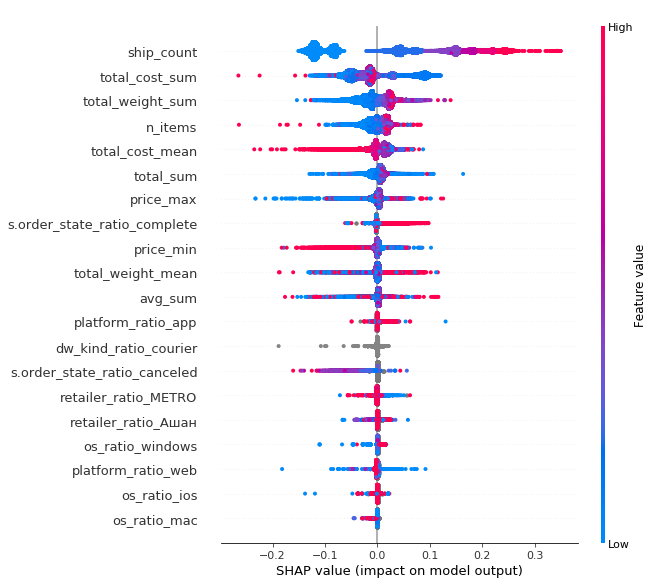

In [324]:
f = plt.figure()
shap.summary_plot(shap_values, X_test)

### Submission

In [489]:
submit_file = pd.read_csv('data/sample_submission.csv', sep = ';')
submit_file.head()

,Id,Predicted
0,19843,NaN
1,471287,NaN
2,342522,NaN
3,457799,NaN
4,233778,NaN


In [490]:
submit_file.shape

(214609, 2)

In [491]:
submit = final.merge(submit_file, how = 'inner', left_on = 'phone_id', right_on = 'Id')

In [492]:
submit.head()

,phone_id,month,price_max,price_min,total_sum,n_items,avg_sum,total_cost_sum,total_cost_mean,total_weight_sum,total_weight_mean,ship_count,os_ratio_android,os_ratio_ios,os_ratio_linux,os_ratio_mac,os_ratio_other,os_ratio_windows,platform_ratio_app,platform_ratio_web,dw_kind_ratio_courier,dw_kind_ratio_express_delivery,dw_kind_ratio_pickup,s.order_state_ratio_canceled,s.order_state_ratio_cart,s.order_state_ratio_complete,s.order_state_ratio_resumed,retailer_ratio_METRO,retailer_ratio_Ашан,retailer_ratio_ВкусВилл,retailer_ratio_Лента,age,gender,Id,Predicted
0,3,2020-03,999.000000,0.000000,4302.640051,152.0,28.306842,0.0,0.000000,31265.0,15632.5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
1,3,2020-05,250.000000,4.990000,3287.040001,95.0,34.600421,168.0,168.000000,25106.0,25106.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
2,3,2020-07,159.009995,9.900000,1883.929992,49.0,38.447551,0.0,0.000000,28032.0,28032.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
3,9,2020-01,699.000000,39.900002,5277.360001,35.0,150.781714,158.0,158.000000,13120.0,13120.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN
4,9,2020-04,999.000000,13.900000,18639.030043,169.0,110.290119,158.0,52.666667,59265.0,19755.0,3,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,2020,NaN,9,NaN


In [493]:
submit.shape

(787737, 35)

In [494]:
submit['month_num'] = submit['month'].apply(lambda x: x[6:])

In [495]:
submit = submit.sort_values('month_num', ascending=False).groupby('phone_id').head(1)

In [496]:
submit.Id.nunique()

214609

In [497]:
submit.reset_index(inplace = True)

In [498]:
submit.head()

,index,phone_id,month,price_max,price_min,total_sum,n_items,avg_sum,total_cost_sum,total_cost_mean,total_weight_sum,total_weight_mean,ship_count,os_ratio_android,os_ratio_ios,os_ratio_linux,os_ratio_mac,os_ratio_other,os_ratio_windows,platform_ratio_app,platform_ratio_web,dw_kind_ratio_courier,dw_kind_ratio_express_delivery,dw_kind_ratio_pickup,s.order_state_ratio_canceled,s.order_state_ratio_cart,s.order_state_ratio_complete,s.order_state_ratio_resumed,retailer_ratio_METRO,retailer_ratio_Ашан,retailer_ratio_ВкусВилл,retailer_ratio_Лента,age,gender,Id,Predicted,month_num
0,787736,719374,2020-08,338.000000,76.900002,2823.830017,22.0,128.355910,0.0,0.000000,17740.0,17740.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,719374,NaN,8
1,524915,238754,2020-08,267.329987,11.500000,2497.779988,39.0,64.045641,158.0,158.000000,19445.0,19445.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238754,NaN,8
2,663005,392839,2020-08,1155.900024,23.490000,6805.169985,90.0,75.613000,0.0,0.000000,20352.0,20352.0,1,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.0,NaN,NaN,1984,female,392839,NaN,8
3,663003,392835,2020-08,702.989990,21.990000,2939.450027,25.0,117.578001,158.0,52.666667,19230.0,6410.0,3,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,0.333333,NaN,0.666667,NaN,NaN,1.0,NaN,NaN,2020,NaN,392835,NaN,8
4,662999,392832,2020-08,569.890015,24.290001,3734.380051,37.0,100.929191,199.0,99.500000,22822.0,11411.0,2,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.0,2020,NaN,392832,NaN,8


In [499]:
submit = submit.fillna(0)

In [500]:
y_pred = log_reg.predict(submit[cols])

In [448]:
y_pred  = y_pred > 0.5  
y_pred = y_pred.astype(int)  

In [501]:
y_pred = pd.DataFrame(y_pred, columns = ['predict'])

In [502]:
submit = submit.merge(y_pred, how = 'inner', left_index = True, right_index = True)

In [503]:
submit.head()

,index,phone_id,month,price_max,price_min,total_sum,n_items,avg_sum,total_cost_sum,total_cost_mean,total_weight_sum,total_weight_mean,ship_count,os_ratio_android,os_ratio_ios,os_ratio_linux,os_ratio_mac,os_ratio_other,os_ratio_windows,platform_ratio_app,platform_ratio_web,dw_kind_ratio_courier,dw_kind_ratio_express_delivery,dw_kind_ratio_pickup,s.order_state_ratio_canceled,s.order_state_ratio_cart,s.order_state_ratio_complete,s.order_state_ratio_resumed,retailer_ratio_METRO,retailer_ratio_Ашан,retailer_ratio_ВкусВилл,retailer_ratio_Лента,age,gender,Id,Predicted,month_num,predict
0,787736,719374,2020-08,338.000000,76.900002,2823.830017,22.0,128.355910,0.0,0.000000,17740.0,17740.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0,0,719374,0.0,8,1.0
1,524915,238754,2020-08,267.329987,11.500000,2497.779988,39.0,64.045641,158.0,158.000000,19445.0,19445.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0,0,238754,0.0,8,1.0
2,663005,392839,2020-08,1155.900024,23.490000,6805.169985,90.0,75.613000,0.0,0.000000,20352.0,20352.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,1.0,0.0,0.0,1984,female,392839,0.0,8,1.0
3,663003,392835,2020-08,702.989990,21.990000,2939.450027,25.0,117.578001,158.0,52.666667,19230.0,6410.0,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.333333,0.0,0.666667,0.0,0.0,1.0,0.0,0.0,2020,0,392835,0.0,8,1.0
4,662999,392832,2020-08,569.890015,24.290001,3734.380051,37.0,100.929191,199.0,99.500000,22822.0,11411.0,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,2020,0,392832,0.0,8,1.0


In [504]:
submit_file['Predicted'] = submit_file.merge(submit[['phone_id', 'predict']], left_on = 'Id', right_on = 'phone_id')['predict']

In [505]:
submit_file.head()

,Id,Predicted
0,19843,1.0
1,471287,1.0
2,342522,1.0
3,457799,1.0
4,233778,1.0


In [506]:
submit_file.Predicted = submit_file.Predicted.astype(int)

In [507]:
submit_file.to_csv('submit_file_log_reg_weight.csv', index = False)

#### Make file for analytics

In [387]:
ship.head()

,user_id,ship_address_id,shipment_id,order_id,order_completed_at,shipment_starts_at,retailer,s.order_state,shipment_state,s.city_name,total_cost,rate,dw_kind,promo_total,total_weight,platform,os,shipped_at,id,phone_id,month
0,11019,171906,322307,2156687,2020-02-18 14:07:00,2020-02-20 07:00:00,METRO,complete,shipped,Москва,168.0,0,courier,0.0,30170,web,windows,2020-02-20 08:08:54,171906,78177,2020-02
1,62278,278832,387023,3021953,2020-01-03 13:09:26,2020-01-03 17:00:00,METRO,complete,shipped,Москва,98.0,0,courier,-150.0,11305,web,windows,2020-01-03 18:10:40,278832,96681,2020-01
2,905126,468407,388943,3018198,2020-02-12 12:39:28,2020-02-13 11:00:00,METRO,complete,shipped,Москва,98.0,5,courier,0.0,13589,app,ios,2020-02-13 12:33:53,468407,140317,2020-02
3,21412,61962,421048,3030227,2020-01-25 11:58:56,2020-01-25 18:00:00,METRO,complete,shipped,Москва,158.0,0,courier,0.0,9726,web,mac,2020-01-25 19:55:32,61962,16,2020-01
4,42110,378297,442659,2923996,2020-01-07 14:30:44,2020-01-07 19:00:00,METRO,complete,shipped,Москва,163.0,0,courier,0.0,30323,web,windows,2020-01-07 19:51:37,378297,60075,2020-01


In [395]:
df_sonya = ship[['phone_id', 'month', 'shipment_id']].groupby(['phone_id', 'month']).count()
mux = pd.MultiIndex.from_product([ship['phone_id'].unique(),
                                  ['2020-0'+str(i) for i in range(1, 9)]], 
                                  names=('phone_id','month'))

df_sonya = df_sonya.reindex(mux).reset_index()

In [396]:
df_sonya['month'] = df_sonya['month'].apply(lambda x: x[6:])

In [400]:
df_sonya.head()

,phone_id,month,shipment_id
0,78177,1,NaN
1,78177,2,1.0
2,78177,3,NaN
3,78177,4,NaN
4,78177,5,NaN


In [398]:
len(df_sonya.phone_id.unique())

606583

In [401]:
df_sonya.to_csv('shipment_counts.csv', index = False)

### Functions

In [32]:
def make_pred(col):
    t = pd.DataFrame(ship.groupby(['phone_id', 'month'])[col].value_counts())
    t1 = pd.DataFrame(ship.groupby(['phone_id', 'month'])[col].count())
    t.columns = [col+'_cnt']
    t.reset_index(inplace = True)
    out = t.merge(t1, how = 'inner', left_on = ['phone_id', 'month'], right_on = ['phone_id', 'month'])
    out[col+'_ratio'] = out[col+'_cnt']/out[col+'_y']
    out.columns = ['phone_id', 'month', col+'_name', col+'_cnt', col+'_total_cnt', col+ '_ratio']
    out.drop(columns = [col+'_cnt', col+'_total_cnt'], inplace = True)
    
    out = pd.pivot_table(out, values=[col+'_ratio'], index=['phone_id', 'month'], 
               columns=[col+'_name'], aggfunc=np.sum)
    out.columns = ['_'.join(col).strip() for col in out.columns.values]
    out.reset_index(inplace=True)
    
    return out